In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size':22})

import warnings
warnings.filterwarnings('ignore')

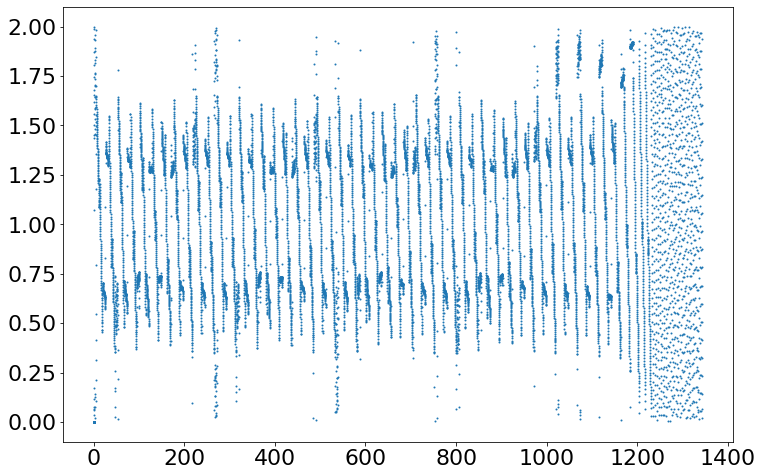

In [5]:
fig,axs = plt.subplots(1,1, sharex=True, sharey=False, figsize=(12,8))
fig.subplots_adjust(hspace=0.0)

def min180To180(val):
    val = val%(2*np.pi)
    lindex = val<-np.pi
    rindex = val>+np.pi
    val = val + 2*np.pi*lindex - 2*np.pi*rindex
    return (val/np.pi)


def min0To360(val):
    val = val%(2*np.pi)
    return (val/np.pi)

for i in [3]:
    
    #p12_data = np.load('./data/res-res/m5K3%1d.npy'%i)
    p12_data = np.load('./data/res-res/orbit_time_000.npy')

    t = p12_data[:,0,0]
    de = p12_data[2:,1,2] - p12_data[:-2,1,2]
    phi = (p12_data[1:-1,1,5] - p12_data[1:-1,1,3])%(2*np.pi)
    dM = ((p12_data[:,0,5]%(2*np.pi) - p12_data[:,1,5]%(2*np.pi)))%(2*np.pi)
    #tmax = np.argmax(t[1:-1]==0)
    icon =( ((dM[2:]-dM[1:-1])*(dM[1:-1]-dM[:-2]))<0 ) * (t[1:-1]<1e1)
    #axs.scatter(phi[icon]/np.pi,de[icon],s=3)
    l0 = p12_data[:,0,5]
    l1 = p12_data[:,1,5]
    pm0 = p12_data[:,0,3] + p12_data[:,0,4]
    pm1 = p12_data[:,1,3] + p12_data[:,1,4]
    p = 6
    q = 1
    ang0 = (p+q)*l1 - p*l0 - q*pm0
    ang1 = (p+q)*l1 - p*l0 - q*pm1
    #axs.scatter(t, l1,s=1)
    #axs.scatter(t, min0To360(ang0),s=1)
    #axs.scatter(t, min180To180(ang1),s=1)
    #axs.plot(t, min180To180(ang1))
    #axs.set_ylim([-5,5])
    
    #axs.scatter(t, min0To360(ang1),s=1)
    #axs.set_xlim([0.990e5,1e5])
    
    axs.scatter(t, min0To360(ang1),s=1)
    #axs.scatter(t, min180To180(ang0))
    #axs.set_xlim([0,1e2])
    


In [ ]:
### fig,axs = plt.subplots(1,1, sharex=True, sharey=False, figsize=(8,8))
fig.subplots_adjust(hspace=0.0)

for i in [0,1,2,3,4]:
    
    p12_data = np.load('./data/res-res/m4K3%1d.npy'%i)

    t = p12_data[:,0,0]
    de = p12_data[2:,1,2] - p12_data[:-2,1,2]
    phi = (p12_data[1:-1,1,5] - p12_data[1:-1,1,3])%(2*np.pi)
    dM = ((p12_data[:,0,5]%(2*np.pi) - p12_data[:,1,5]%(2*np.pi)))%(2*np.pi)
    #tmax = np.argmax(t[1:-1]==0)
    print(t[-1])
    icon =( ((dM[2:]-dM[1:-1])*(dM[1:-1]-dM[:-2]))<0 ) * (t[1:-1]>1e-2)
    #axs.scatter(phi[icon]/np.pi,de[icon],s=3)
    axs.scatter(t[1:-1],phi,s=3)
    l0 = p12_data[1:-1,0,5] - p12_data[1:-1,0,3]
    l1 = p12_data[1:-1,1,5] - p12_data[1:-1,1,3]
    ang = 14*l0 - 13*l1 - p12_data[1:-1,1,3]
    axs.scatter(t[1:-1],ang%(2*np.pi),s=1)
    axs.set_xlim([0,300])